In [164]:
import tensorflow as tf

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
import datetime

from sklearn.preprocessing import MinMaxScaler


In [165]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [166]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [167]:
weather=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Rainfall_Prediction/Almora.csv",index_col='date_time',parse_dates=True)

In [168]:
weather.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
date_time,,,,,,,,,,,,,,,,,,,,,
2009-01-01,19,6,0.0,8.7,4,32,10:02 AM,09:46 PM,07:06 AM,05:24 PM,...,20,1,27,0.0,1018,19,10,105,11,Almora
2009-01-02,18,6,0.0,8.7,4,39,10:30 AM,10:42 PM,07:07 AM,05:24 PM,...,18,4,30,0.0,1018,18,10,103,10,Almora
2009-01-03,18,7,0.0,8.7,4,46,10:59 AM,11:40 PM,07:07 AM,05:25 PM,...,16,9,37,0.0,1018,18,10,105,9,Almora
2009-01-04,19,7,0.0,8.7,4,53,11:30 AM,No moonset,07:07 AM,05:26 PM,...,12,28,39,0.2,1016,19,10,102,7,Almora
2009-01-05,17,7,0.0,8.7,3,59,12:03 PM,12:39 AM,07:07 AM,05:27 PM,...,13,21,51,8.3,1015,17,10,105,7,Almora


In [169]:
weather.describe()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,4885.000000,4885.000000,4885.00000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000,4885.000000
mean,26.073490,11.705629,0.12346,10.793736,5.204504,50.056295,6.980962,18.200819,18.454248,17.792016,10.093552,22.082497,56.615967,10.560594,1011.534084,26.073490,9.194473,137.966223,6.059161
std,5.787363,6.249270,1.67259,2.326843,1.326099,28.883275,9.776927,6.988700,6.728760,6.599436,4.007473,23.972709,23.916425,22.144677,5.841995,5.787363,1.302776,41.374227,2.320982
min,4.000000,-3.000000,0.00000,3.800000,1.000000,0.000000,-23.000000,1.000000,2.000000,1.000000,2.000000,0.000000,7.000000,0.000000,997.000000,4.000000,3.000000,23.000000,1.000000
25%,22.000000,6.000000,0.00000,8.700000,4.000000,25.000000,-1.000000,12.000000,13.000000,12.000000,7.000000,3.000000,36.000000,0.000000,1007.000000,22.000000,9.000000,108.000000,4.000000
50%,26.000000,12.000000,0.00000,11.600000,5.000000,50.000000,5.000000,19.000000,19.000000,19.000000,9.000000,12.000000,57.000000,0.200000,1012.000000,26.000000,10.000000,137.000000,6.000000
75%,30.000000,17.000000,0.00000,13.000000,6.000000,75.000000,17.000000,24.000000,24.000000,23.000000,12.000000,37.000000,79.000000,12.200000,1016.000000,30.000000,10.000000,159.000000,7.000000
max,41.000000,24.000000,64.90000,14.000000,9.000000,100.000000,23.000000,33.000000,33.000000,32.000000,28.000000,100.000000,98.000000,330.400000,1025.000000,41.000000,10.000000,312.000000,18.000000


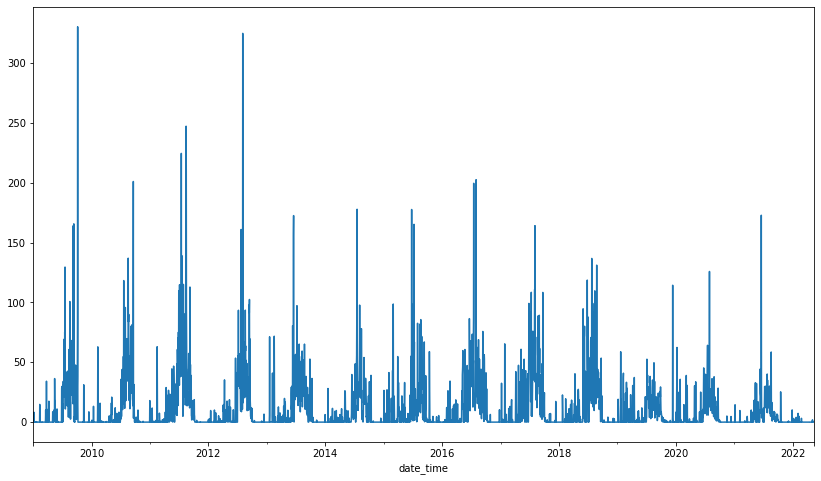

In [170]:
weather.precipMM.plot(figsize=(14,8))

In [171]:
weather.corr()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
maxtempC,1.000000,0.742978,-0.170311,0.683751,0.911206,-0.020534,0.374825,0.870769,0.863208,0.902729,0.124296,-0.083344,-0.155818,-0.001982,-0.637521,1.000000,-0.012840,0.346818,0.227621
mintempC,0.742978,1.000000,-0.122730,0.653630,0.719444,-0.010346,0.697049,0.949160,0.953508,0.942672,0.140038,0.383572,0.246739,0.392819,-0.858541,0.742978,-0.442007,0.279980,0.217266
totalSnow_cm,-0.170311,-0.122730,1.000000,-0.130926,-0.175036,0.015469,-0.036008,-0.141051,-0.137635,-0.144797,-0.001317,0.116661,0.073168,0.098934,0.072324,-0.170311,-0.146762,-0.090667,-0.012742
sunHour,0.683751,0.653630,-0.130926,1.000000,0.665915,-0.012385,0.356625,0.706056,0.706170,0.720607,0.213865,-0.075044,-0.066929,0.135077,-0.645450,0.683751,-0.182913,0.234152,0.301468
uvIndex,0.911206,0.719444,-0.175036,0.665915,1.000000,-0.017738,0.287610,0.821244,0.816573,0.861435,0.205337,-0.156891,-0.230082,-0.016830,-0.609265,0.911206,0.036589,0.308511,0.311590
moon_illumination,-0.020534,-0.010346,0.015469,-0.012385,-0.017738,1.000000,0.002679,-0.015830,-0.015972,-0.014813,0.001693,0.016134,0.009512,0.025866,-0.011148,-0.020534,-0.011745,-0.015353,0.002458
DewPointC,0.374825,0.697049,-0.036008,0.356625,0.287610,0.002679,1.000000,0.684031,0.683838,0.617897,-0.399926,0.603794,0.828229,0.541059,-0.700425,0.374825,-0.665296,0.379321,-0.347480
FeelsLikeC,0.870769,0.949160,-0.141051,0.706056,0.821244,-0.015830,0.684031,1.000000,0.998044,0.990383,0.045050,0.288109,0.189952,0.294099,-0.854206,0.870769,-0.353445,0.389454,0.140555
HeatIndexC,0.863208,0.953508,-0.137635,0.706170,0.816573,-0.015972,0.683838,0.998044,1.000000,0.987996,0.059389,0.298061,0.191150,0.302214,-0.859017,0.863208,-0.361254,0.379195,0.152904
WindChillC,0.902729,0.942672,-0.144797,0.720607,0.861435,-0.014813,0.617897,0.990383,0.987996,1.000000,0.110531,0.216522,0.100665,0.246537,-0.828076,0.902729,-0.285717,0.352990,0.211446


In [172]:
weather.drop(['FeelsLikeC','tempC','totalSnow_cm','location'],axis=1,inplace=True)

In [173]:
weather.head()

,maxtempC,mintempC,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,
2009-01-01,19,6,8.7,4,32,10:02 AM,09:46 PM,07:06 AM,05:24 PM,-9,10,9,20,1,27,0.0,1018,10,105,11
2009-01-02,18,6,8.7,4,39,10:30 AM,10:42 PM,07:07 AM,05:24 PM,-8,10,9,18,4,30,0.0,1018,10,103,10
2009-01-03,18,7,8.7,4,46,10:59 AM,11:40 PM,07:07 AM,05:25 PM,-4,11,9,16,9,37,0.0,1018,10,105,9
2009-01-04,19,7,8.7,4,53,11:30 AM,No moonset,07:07 AM,05:26 PM,-2,12,11,12,28,39,0.2,1016,10,102,7
2009-01-05,17,7,8.7,3,59,12:03 PM,12:39 AM,07:07 AM,05:27 PM,0,11,10,13,21,51,8.3,1015,10,105,7


In [174]:
weather['sunrise']

date_time
2009-01-01    07:06 AM
2009-01-02    07:07 AM
2009-01-03    07:07 AM
2009-01-04    07:07 AM
2009-01-05    07:07 AM
                ...   
2022-05-13    05:20 AM
2022-05-14    05:20 AM
2022-05-15    05:19 AM
2022-05-16    05:19 AM
2022-05-17    05:18 AM
Name: sunrise, Length: 4885, dtype: object

In [175]:
#convert sunrise time into seconds
weather['sunrise']=pd.to_datetime(weather['sunrise'])
date=datetime.datetime(weather['sunrise'][0].year, weather['sunrise'][0].month,weather['sunrise'][0].day)
weather['sunrise']=weather['sunrise']-date
weather['sunrise']=weather['sunrise'].dt.total_seconds()

In [176]:
#convert sunset time into seconds
weather['sunset']=pd.to_datetime(weather['sunset'])
date=datetime.datetime(weather['sunset'][0].year, weather['sunset'][0].month,weather['sunset'][0].day)
weather['sunset']=weather['sunset']-date
weather['sunset']=weather['sunset'].dt.total_seconds()

In [177]:
weather.loc[weather["moonrise"] == "No moonrise", "moonrise"] = 0

#convert moonrise time into seconds
weather['moonrise']=pd.to_datetime(weather['moonrise'])
date=datetime.datetime(weather['moonrise'][0].year, weather['moonrise'][0].month,weather['moonrise'][0].day)
weather['moonrise']=weather['moonrise']-date
weather['moonrise']=weather['moonrise'].dt.total_seconds()

In [178]:
weather.loc[weather["moonset"] == "No moonset", "moonset"] = 0

#convert moonset time into seconds
weather['moonset']=pd.to_datetime(weather['moonset'])
date=datetime.datetime(weather['moonset'][0].year, weather['moonset'][0].month,weather['moonset'][0].day)
weather['moonset']=weather['moonset']-date
weather['moonset']=weather['moonset'].dt.total_seconds()

In [179]:
weather.head()

,maxtempC,mintempC,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,
2009-01-01,19,6,8.7,4,32,36120.0,7.836000e+04,25560.0,62640.0,-9,10,9,20,1,27,0.0,1018,10,105,11
2009-01-02,18,6,8.7,4,39,37800.0,8.172000e+04,25620.0,62640.0,-8,10,9,18,4,30,0.0,1018,10,103,10
2009-01-03,18,7,8.7,4,46,39540.0,8.520000e+04,25620.0,62700.0,-4,11,9,16,9,37,0.0,1018,10,105,9
2009-01-04,19,7,8.7,4,53,41400.0,-1.652918e+09,25620.0,62760.0,-2,12,11,12,28,39,0.2,1016,10,102,7
2009-01-05,17,7,8.7,3,59,43380.0,2.340000e+03,25620.0,62820.0,0,11,10,13,21,51,8.3,1015,10,105,7


In [180]:
#Put precipitation as first column

first_column = weather.pop('precipMM')
  
# insert column using insert(position,column_name,
# first_column) function
weather.insert(0, 'precipMM', first_column)
weather.head()

,precipMM,maxtempC,mintempC,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,pressure,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,
2009-01-01,0.0,19,6,8.7,4,32,36120.0,7.836000e+04,25560.0,62640.0,-9,10,9,20,1,27,1018,10,105,11
2009-01-02,0.0,18,6,8.7,4,39,37800.0,8.172000e+04,25620.0,62640.0,-8,10,9,18,4,30,1018,10,103,10
2009-01-03,0.0,18,7,8.7,4,46,39540.0,8.520000e+04,25620.0,62700.0,-4,11,9,16,9,37,1018,10,105,9
2009-01-04,0.2,19,7,8.7,4,53,41400.0,-1.652918e+09,25620.0,62760.0,-2,12,11,12,28,39,1016,10,102,7
2009-01-05,8.3,17,7,8.7,3,59,43380.0,2.340000e+03,25620.0,62820.0,0,11,10,13,21,51,1015,10,105,7


In [181]:
weather.index

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05', '2009-01-06', '2009-01-07', '2009-01-08',
               '2009-01-09', '2009-01-10',
               ...
               '2022-05-08', '2022-05-09', '2022-05-10', '2022-05-11',
               '2022-05-12', '2022-05-13', '2022-05-14', '2022-05-15',
               '2022-05-16', '2022-05-17'],
              dtype='datetime64[ns]', name='date_time', length=4885, freq=None)

In [182]:

dates=pd.DataFrame(weather.index)
dates.head()

,date_time
0,2009-01-01
1,2009-01-02
2,2009-01-03
3,2009-01-04
4,2009-01-05


In [183]:
weather.columns

Index(['precipMM', 'maxtempC', 'mintempC', 'sunHour', 'uvIndex',
       'moon_illumination', 'moonrise', 'moonset', 'sunrise', 'sunset',
       'DewPointC', 'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover',
       'humidity', 'pressure', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

In [184]:
col_training=['precipMM','maxtempC', 'mintempC', 'sunHour', 'uvIndex', 'moon_illumination','moonrise', 'moonset', 'sunrise', 'sunset', 'DewPointC', 'HeatIndexC','WindChillC', 'WindGustKmph', 'cloudcover', 'humidity','pressure', 'visibility', 'winddirDegree', 'windspeedKmph']

In [185]:
weather_full=weather[col_training].astype(float)

In [186]:
#split in training and testing data
training_data=weather_full.iloc[:weather.index.get_loc('2021-01-01')]
test_data=weather_full.iloc[weather.index.get_loc('2021-01-01'):]

In [187]:
weather

,precipMM,maxtempC,mintempC,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,pressure,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,
2009-01-01,0.0,19,6,8.7,4,32,36120.0,7.836000e+04,25560.0,62640.0,-9,10,9,20,1,27,1018,10,105,11
2009-01-02,0.0,18,6,8.7,4,39,37800.0,8.172000e+04,25620.0,62640.0,-8,10,9,18,4,30,1018,10,103,10
2009-01-03,0.0,18,7,8.7,4,46,39540.0,8.520000e+04,25620.0,62700.0,-4,11,9,16,9,37,1018,10,105,9
2009-01-04,0.2,19,7,8.7,4,53,41400.0,-1.652918e+09,25620.0,62760.0,-2,12,11,12,28,39,1016,10,102,7
2009-01-05,8.3,17,7,8.7,3,59,43380.0,2.340000e+03,25620.0,62820.0,0,11,10,13,21,51,1015,10,105,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-13,0.0,40,16,13.4,8,83,57480.0,1.236000e+04,19200.0,68160.0,10,27,27,10,16,41,1001,10,113,7
2022-05-14,0.0,40,18,13.4,8,90,61320.0,1.428000e+04,19200.0,68160.0,9,28,28,10,10,32,1001,10,137,7
2022-05-15,0.0,41,19,13.4,8,97,65400.0,1.638000e+04,19140.0,68220.0,6,28,29,11,7,24,1003,10,190,8


In [188]:
weather.index.get_loc('2022-01-01')

4748

In [189]:

scaler = MinMaxScaler()

scaler=scaler.fit(training_data)
training_data_transformed= scaler.transform(training_data)
test_data_transformed = scaler.transform(test_data)
training_data_transformed

array([[0.        , 0.40540541, 0.33333333, ..., 1.        , 0.28373702,
        0.58823529],
       [0.        , 0.37837838, 0.33333333, ..., 1.        , 0.27681661,
        0.52941176],
       [0.        , 0.37837838, 0.37037037, ..., 1.        , 0.28373702,
        0.47058824],
       ...,
       [0.        , 0.45945946, 0.18518519, ..., 1.        , 0.25951557,
        0.17647059],
       [0.        , 0.37837838, 0.14814815, ..., 1.        , 0.42214533,
        0.17647059],
       [0.        , 0.48648649, 0.22222222, ..., 1.        , 0.23183391,
        0.11764706]])

In [190]:
training_data_transformed.shape[1]

20

In [191]:
#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 120  # Number of past days we want to use to predict the future.
n_features=training_data_transformed.shape[1]

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(training_data_transformed) - n_future +1):
    trainX.append(training_data_transformed[i - n_past:i, 0:training_data.shape[1]])
    trainY.append(training_data_transformed[i + n_future - 1:i + n_future, 0])

In [192]:
trainX, trainY = np.array(trainX), np.array(trainY)

In [193]:
print(trainX.shape)
print(trainY.shape)

(4263, 120, 20)
(4263, 1)


In [194]:

#define LSTM Model

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 120, 64)           21760     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 34,209
Trainable params: 34,209
Non-trainable params: 0
_________________________________________________________________


In [195]:
# fit the model
history = model.fit(trainX, trainY, epochs=10, batch_size=1, validation_split=0.1, verbose=1)

Epoch 1/10
3836/3836 [==============================] - 228s 59ms/step - loss: 0.0039 - val_loss: 0.0022
Epoch 2/10
3836/3836 [==============================] - 225s 59ms/step - loss: 0.0034 - val_loss: 0.0016
Epoch 3/10
3836/3836 [==============================] - 223s 58ms/step - loss: 0.0031 - val_loss: 0.0016
Epoch 4/10
3836/3836 [==============================] - 224s 58ms/step - loss: 0.0030 - val_loss: 0.0019
Epoch 5/10
3836/3836 [==============================] - 223s 58ms/step - loss: 0.0029 - val_loss: 0.0023
Epoch 6/10
3836/3836 [==============================] - 221s 58ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 7/10
3836/3836 [==============================] - 222s 58ms/step - loss: 0.0029 - val_loss: 0.0015
Epoch 8/10
3836/3836 [==============================] - 222s 58ms/step - loss: 0.0028 - val_loss: 0.0017
Epoch 9/10
3836/3836 [==============================] - 222s 58ms/step - loss: 0.0029 - val_loss: 0.0019
Epoch 10/10
3836/3836 [==============================] 

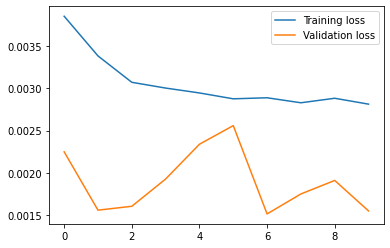

In [196]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [197]:
from statsmodels.tsa.seasonal import seasonal_decompose


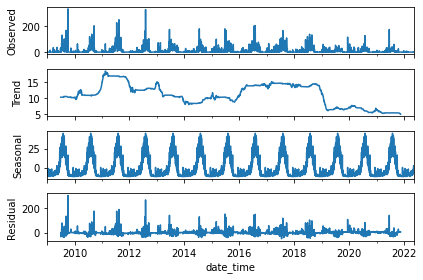

In [198]:
results = seasonal_decompose(weather['precipMM'],freq=365)
results.plot();

In [199]:
training_data.shape[1]

20

In [200]:
test_predictions = []

first_eval_batch = training_data_transformed[-n_past:]
current_batch = first_eval_batch.reshape((1, n_past, n_features))

for i in range(len(test_data_transformed)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    temp=np.zeros((1,1,training_data.shape[1]))
    temp[0,0,0]=current_pred
    temp[0,0,1:training_data.shape[1]]=test_data_transformed[i][1:training_data.shape[1]]
    current_batch = np.append(current_batch[:,1:,:],[temp[:,0,:]],axis=1)

In [201]:
prediction_copies = np.repeat(test_predictions, test_data.shape[1], axis=-1)
rainfall_pred = scaler.inverse_transform(prediction_copies)[:,0]


#testdata_copies = np.repeat(test_data_transformed, test_data.shape[1], axis=-1)
#rainfall_actual = scaler.inverse_transform(testdata_copies)[:,0]


In [202]:
#testdata_copies = np.repeat(test_data_transformed, test_data.shape[1], axis=-1)
rainfall_actual = scaler.inverse_transform(test_data_transformed)[:,0]

In [203]:
rainfall_actual

array([0.000e+00, 0.000e+00, 0.000e+00, 1.600e+00, 3.900e+00, 1.450e+01,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 9.700e+00,
       1.000e-01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.000e-01,
       1.100e+00, 0.000e+00, 0.000e+00, 1.000e-01, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 4.800e+00, 

In [204]:
test_data_transformed.shape

(502, 20)

In [205]:
test_data_transformed[1]

array([0.        , 0.45945946, 0.22222222, 0.32352941, 0.25      ,
       0.76      , 0.99999252, 0.99996875, 0.99145299, 0.10483871,
       0.32608696, 0.3       , 0.29032258, 0.15384615, 0.37      ,
       0.21978022, 0.78571429, 1.        , 0.46712803, 0.17647059])

In [206]:
rainfall_actual

array([0.000e+00, 0.000e+00, 0.000e+00, 1.600e+00, 3.900e+00, 1.450e+01,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 9.700e+00,
       1.000e-01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.000e-01,
       1.100e+00, 0.000e+00, 0.000e+00, 1.000e-01, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 4.800e+00, 

In [207]:
test_data['pred']=rainfall_pred
test_data['actual']=rainfall_actual

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [208]:
test_data[['actual','pred']]

,actual,pred
date_time,,
2021-01-01,0.0,2.236464
2021-01-02,0.0,1.988483
2021-01-03,0.0,2.627873
2021-01-04,1.6,2.820465
2021-01-05,3.9,4.044242
...,...,...
2022-05-13,0.0,7.822334
2022-05-14,0.0,6.387988
2022-05-15,0.0,6.117497


In [209]:
#min(test_data['pred'])

#test_data.loc[test_data["pred"] >3, "pred"] = 3

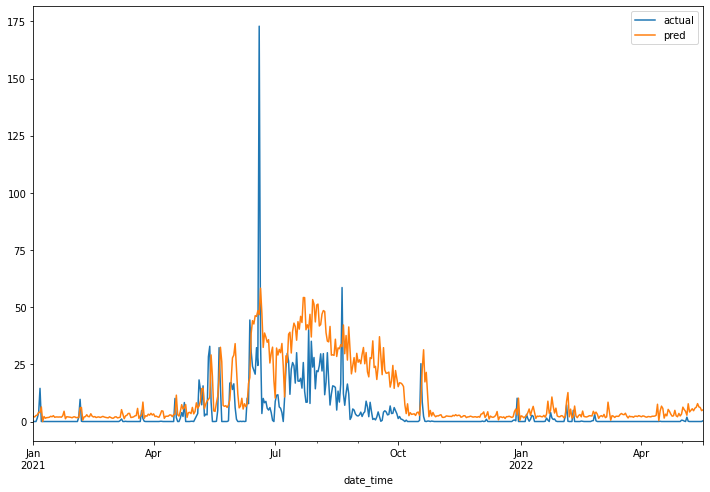

In [210]:
test_data[['actual','pred']].plot(figsize=(12,8))

In [211]:
rmse=sqrt(mean_squared_error(test_data['actual'],test_data['pred']))
print(rmse)

13.225828296775333


In [212]:
#epoch 10 , batch 10 past_days 60 then RMSE: 1.3818
#epoch 20 , batch 6 past_days 120 then RMSE: 2.295 (but graph is better in end)
#epoch 10 , batch 1 past_days 60 then RMSE: 2.0361  (but graph is better in end)
#epoch 10 , batch 1 past_days 5 then RMSE: 2.0711  (but graph is better in end)
#epoch 10 , batch 1 past_days 30 then RMSE: 13.299 Almora for past 1 year (best result)